In [19]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [52]:
##Q1: Write python codes to calculate GLCM matrix for any size of input image. (try with any input image) (pt 5)

gray_degree = 16

def GLCM(input, x_val, y_val):
    src_img = input.copy()
    
    retval = [[0.0 for m in range(gray_level)] for n in range(gray_level)]
    
    (h_i,w_i) = input.shape
    
    Mgray_degree = 0
    
    (h1_i, w1_i) = input.shape
    
    for n in range(h1_i):
        for m in range(w1_i):
            if input[n][m] > Mgray_degree:
                Mgray_degree = input[n][m]
    
    Mgray_degree = Mgray_degree + 1

    if Mgray_degree > gray_degree:
        for n in range(h_i):
            for m in range(w_i):
                src_img[n][m] = src_img[n][m]*gray_degree / Mgray_degree

    for n in range(h_i - y_val):
        for m in range(w_i - x_val):
             rowval = src_img[n][m]
             colval = src_img[n + y_val][m + x_val]
             retval[rowval][colval] = retval[rowval][colval] + 1.0

    for n in range(gray_degree):
        for m in range(gray_degree):
            retval[m][n] = retval[m][n]/float(h_i * w_i)

    return retval


img_glcm = cv2.imread("peppers_color.tif")

img_shape = img_glcm.shape
x = int(img_shape[1]/2)
y = int(img_shape[0]/2)
img_glcm = cv2.resize(img_glcm, (x, y), interpolation = cv2.INTER_CUBIC)
img_gray = cv2.cvtColor(img_glcm, cv2.COLOR_BGR2GRAY)

glcm_result = GLCM(img_gray, 1,0)
glcm_result

[[0.0247039794921875,
  0.0048675537109375,
  0.0009002685546875,
  0.000396728515625,
  0.0002899169921875,
  0.0002593994140625,
  0.0001983642578125,
  0.0001068115234375,
  0.0001068115234375,
  3.0517578125e-05,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0045318603515625,
  0.0289764404296875,
  0.0068206787109375,
  0.0013885498046875,
  0.0006103515625,
  0.0004425048828125,
  0.000335693359375,
  0.0002899169921875,
  0.0001983642578125,
  0.0001678466796875,
  7.62939453125e-05,
  1.52587890625e-05,
  0.0,
  1.52587890625e-05,
  0.0,
  0.0],
 [0.0007476806640625,
  0.0058135986328125,
  0.0112762451171875,
  0.0047760009765625,
  0.0012969970703125,
  0.000946044921875,
  0.0003509521484375,
  0.000274658203125,
  0.0002899169921875,
  0.000274658203125,
  0.0001678466796875,
  1.52587890625e-05,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0004425048828125,
  0.0014801025390625,
  0.0043487548828125,
  0.0256805419921875,
  0.0081024169921875,
  0.0015411376953125,
  0.00050354003906

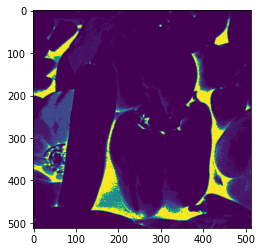

In [58]:
##Q2: Write python codes to get the image after operating LBP on the original image. You should submit the codes, original image, the resulted image after using LBP. (pt 5)


def calculate_pixel(ip_img, c_val, x_val, y_val):
    pixel_value = 0
    
    try: ### If local neighbourhood pixel value >= center pixel values then set it to 1
        if ip_img[x_val][y_val] >= c_val:
            pixel_value = 1
    except: ### When neighbourhood value of a center pixel is null
        pass
      
    return pixel_value
   
# Function for calculating LBP
def LBP(ip_img, x_val, y_val):
   
    c_val = ip_img[x_val][y_val]
    arr = []
          
    top_left = get_pixel(ip_img, c_val, x-1, y-1)
    top = get_pixel(ip_img, c_val, x-1, y)
    top_right = get_pixel(ip_img, c_val, x-1, y + 1)
    right = get_pixel(ip_img, c_val, x, y + 1)
    bottom_right = get_pixel(ip_img, c_val, x + 1, y + 1)
    bottom = get_pixel(ip_img, c_val, x + 1, y)
    bottom_left = get_pixel(ip_img, c_val, x + 1, y-1)
    left = get_pixel(ip_img, c_val, x, y-1)
        
    arr.extend([top_left, top, top_right, right, bottom_right, bottom, bottom_left, left])
       
    convertlist = [1, 2, 4, 8, 16, 32, 64, 128]
    lbp = 0
      
    for i in range(len(arr)):
        lbp = lbp + (arr[i] * convertlist[i])
          
    return lbp


img_bgr = cv2.imread("peppers_color.tif", 1)

h, w, k = img_bgr.shape
   
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((h, w),np.uint8)
   
for m in range(0, h):
    for n in range(0, w):
        img_lbp[m, n] = LBP(img_gray, m, n)
  
plt.imshow(img_lbp)
plt.show()

<ipython-input-48-050081642333>:13: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(np.square(x), axis=axis))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


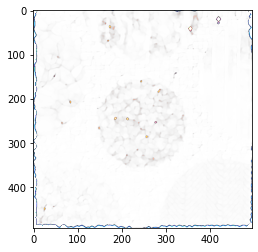

In [48]:
##Q3: Texture based segmentation - cluster the following image using texture analysis
    
import scipy.ndimage
import scipy.signal
from skimage import color, io

## Calculating the Gradient
def grad_val(x):
    return np.array(np.gradient(x))


def norm_val(x, axis=0):
    return np.sqrt(np.sum(np.square(x), axis=axis))


def detecting_edges(x):
    return 1. / (1. + norm_val(grad_val(x))**2)



img_texture = io.imread('texture_img.png')
img_texture = img_texture - np.mean(img_texture)

# Smoothing the image 
img_smooth = scipy.ndimage.filters.gaussian_filter(img_texture, 2)

aval = 1.
count = 0
img_edge = detecting_edges(img_smooth)

while count < 15:
    sharp_grad = grad_val(img_edge)
    sharp_norm = norm_val(sharp_grad)

    img_t = img_edge * sharp_norm
    img_edge = img_edge + aval * img_t
    count = count + 1

plt.imshow(img_edge)
plt.show()